In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
def url_to_transcript(url):
    page=requests.get(url).text
    soup=BeautifulSoup(page,'lxml')
    text=[p.text for p in soup.find(class_='post-content').find_all('p')]
    print(url)
    return text

In [3]:
urls = ['https://scrapsfromtheloft.com/2018/12/15/vir-das-losing-it-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']
comedians = ['Vir', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [4]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2018/12/15/vir-das-losing-it-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-

In [5]:
for i,c in enumerate(comedians):
    with open(r'C:\Users\Pritam\Desktop\Transcripts/'+ c + '.txt', 'wb') as file:
        pickle.dump(transcripts[i], file)

In [6]:
data={}
for i,c in enumerate(comedians):
    with open(r'C:\Users\Pritam\Desktop\Transcripts/'+ c + '.txt', 'rb') as file:
        data[c]=pickle.load(file)

In [7]:
data.keys()

dict_keys(['Vir', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [8]:
def combine_text(list_of_text):
    combined_text=' '.join(list_of_text)
    return combined_text

In [9]:
data_combined={key: [combine_text(value)] for (key,value) in data.items()}

In [10]:
import pandas as pd
pd.set_option('max_colwidth',150)
data_df=pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns=['transcript']
data_df=data_df.sort_index()
data_df

,transcript
Vir,"I lost 80% of my mind. It’s very freeing. You should see the look on your faces right now, by the way. Oh! Good evening, San Francisco. Are you gu..."
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he m..."


In [11]:
import re
import string
def clean_text_round1(text):
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
round1=lambda x:clean_text_round1(x)

In [12]:
dataclean=pd.DataFrame(data_df.transcript.apply(round1))
dataclean

,transcript
Vir,i lost of my mind its very freeing you should see the look on your faces right now by the way oh good evening san francisco are you guys excited ...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met b...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(dataclean['transcript'])
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=dataclean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,abc,abcs,abducted,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data_dtm.to_pickle(r'C:\Users\Pritam\Desktop\Transcripts\dtm.pkl')

In [15]:
dataclean.to_pickle(r'C:\Users\Pritam\Desktop\Transcripts\clean.pkl')

In [16]:
data=pd.read_pickle(r'C:\Users\Pritam\Desktop\Transcripts\dtm.pkl')

In [17]:
data.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,abc,abcs,abducted,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
data=data.transpose()

In [19]:
data.head()

,Vir,ali,anthony,bill,bo,dave,hasan,jim,joe,john,mike,ricky
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
top_dict={}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)
    top_dict[c]=list(zip(top.index, top.values))
top_dict['Vir']

[('like', 76),
 ('just', 63),
 ('know', 54),
 ('shit', 44),
 ('im', 39),
 ('dont', 39),
 ('thats', 36),
 ('think', 31),
 ('right', 28),
 ('guys', 25),
 ('youre', 24),
 ('did', 24),
 ('indian', 24),
 ('yeah', 24),
 ('years', 22),
 ('world', 22),
 ('got', 21),
 ('beautiful', 20),
 ('people', 20),
 ('beef', 19),
 ('day', 18),
 ('india', 18),
 ('time', 17),
 ('man', 17),
 ('believe', 17),
 ('fuck', 17),
 ('god', 16),
 ('good', 16),
 ('big', 16),
 ('thing', 16)]

In [21]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join(word for word, count in top_words[0:14]))
    print('----')

Vir
like, just, know, shit, im, dont, thats, think, right, guys, youre, did, indian, yeah
----
ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, wanna, oh
----
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
----
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
----
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, time, hey, got
----
mike
like, im, know, said, just, dont, thats

In [29]:
from collections import Counter

words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'know',
 'shit',
 'im',
 'dont',
 'thats',
 'think',
 'right',
 'guys',
 'youre',
 'did',
 'indian',
 'yeah',
 'years',
 'world',
 'got',
 'beautiful',
 'people',
 'beef',
 'day',
 'india',
 'time',
 'man',
 'believe',
 'fuck',
 'god',
 'good',
 'big',
 'thing',
 'like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'right',
 'got',
 'time',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'work',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'time',
 'think',
 'thing',
 'good',
 'school',
 'yeah',
 'jokes',
 'did',
 'okay',
 'ive',
 'baby',
 'gonna',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'think',
 'fuck',
 'pe

In [32]:
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 11),
 ('think', 8),
 ('yeah', 8),
 ('time', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('fuck', 6),
 ('oh', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('did', 5),
 ('good', 5),
 ('thing', 5),
 ('cause', 5),
 ('hes', 5),
 ('want', 5),
 ('going', 5),
 ('guys', 4),
 ('man', 4),
 ('didnt', 4),
 ('theyre', 4),
 ('theres', 4),
 ('really', 4),
 ('dude', 3),
 ('ive', 3),
 ('little', 3),
 ('went', 3),
 ('years', 2),
 ('god', 2),
 ('big', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('life', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('real', 2),
 ('id', 2),
 ('indian', 1),
 ('world', 1),
 ('beautiful', 1),
 ('beef', 1),
 ('india', 1),
 ('believe', 1),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1

In [35]:
add_stop_words=[word for word, count in Counter(words).most_common() if count>6]

In [36]:
add_stop_words

['like',
 'just',
 'know',
 'im',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'think',
 'yeah',
 'time',
 'gonna',
 'said']

In [37]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean=pd.read_pickle(r'C:\Users\Pritam\Desktop\Transcripts\clean.pkl')

In [38]:
data_clean

,transcript
Vir,i lost of my mind its very freeing you should see the look on your faces right now by the way oh good evening san francisco are you guys excited ...
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,armed with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on marriage his beef with babies and the time he met b...


In [40]:
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)
cv=CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(data_clean.transcript)
data_stop=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index=data_clean.index

In [41]:
import pickle
pickle.dump(cv, open(r'C:\Users\Pritam\Desktop\Transcripts\cv_stop.pkl', 'wb'))
data_stop.to_pickle(r'C:\Users\Pritam\Desktop\Transcripts\dtm_stop.pkl')

In [42]:
data_stop

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,abc,abcs,abducted,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
Vir,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
from wordcloud import WordCloud
wc= WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
data.head()

,Vir,ali,anthony,bill,bo,dave,hasan,jim,joe,john,mike,ricky
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,0,0,0,0,1,0,0,0,0,0,0


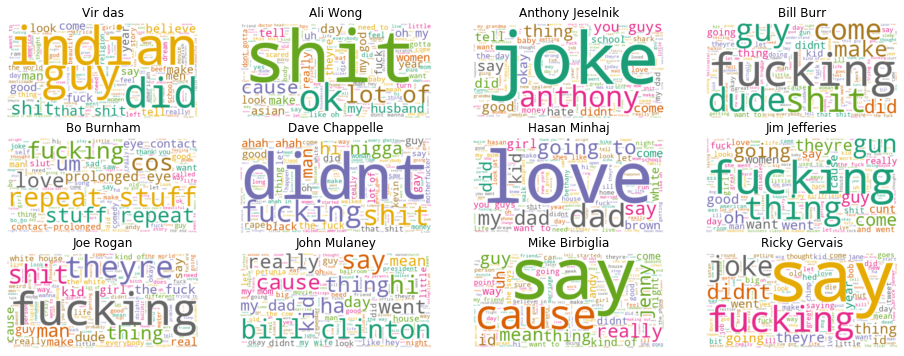

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Vir das','Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Mike Birbiglia', 'Ricky Gervais']

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [47]:
unique_list=[]

for comedian in data.columns:
    uniques=data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [48]:
data_words=pd.DataFrame({'comedian':full_names,'unique_words':unique_list})
data_unique_sort=data_words.sort_values(by='unique_words')
data_words

,comedian,unique_words
0,Vir das,1390
1,Ali Wong,1341
2,Anthony Jeselnik,983
3,Bill Burr,1633
4,Bo Burnham,1272
5,Dave Chappelle,1404
6,Hasan Minhaj,1559
7,Jim Jefferies,1313
8,Joe Rogan,1435
9,John Mulaney,1399


In [49]:
data['bill'].to_numpy().nonzero()[0].size

1633

In [50]:
total_list=[]
for comedian in data.columns:
    totals=sum(data[comedian])
    total_list.append(totals)
total_list

[3639, 3283, 2905, 5535, 3165, 4094, 4777, 4764, 4579, 4019, 4741, 4972]

In [52]:
data_words['total_words']=total_list

In [53]:
data_words

,comedian,unique_words,total_words
0,Vir das,1390,3639
1,Ali Wong,1341,3283
2,Anthony Jeselnik,983,2905
3,Bill Burr,1633,5535
4,Bo Burnham,1272,3165
5,Dave Chappelle,1404,4094
6,Hasan Minhaj,1559,4777
7,Jim Jefferies,1313,4764
8,Joe Rogan,1435,4579
9,John Mulaney,1399,4019


Text(0.5, 1.0, 'Number of Unique Words')

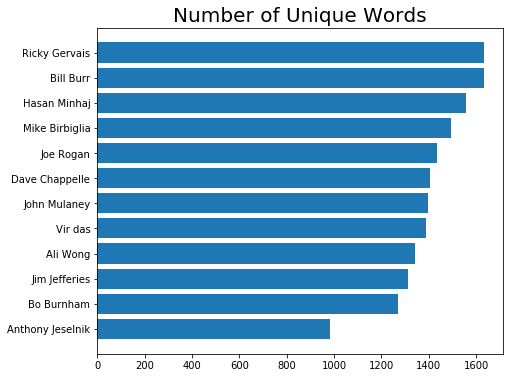

In [54]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

In [57]:
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 11),
 ('think', 8),
 ('yeah', 8),
 ('time', 8),
 ('gonna', 7),
 ('said', 7),
 ('day', 6),
 ('fuck', 6),
 ('oh', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('did', 5),
 ('good', 5),
 ('thing', 5),
 ('cause', 5),
 ('hes', 5),
 ('want', 5),
 ('going', 5),
 ('guys', 4),
 ('man', 4),
 ('didnt', 4),
 ('theyre', 4),
 ('theres', 4),
 ('really', 4),
 ('dude', 3),
 ('ive', 3),
 ('little', 3),
 ('went', 3),
 ('years', 2),
 ('god', 2),
 ('big', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('life', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('real', 2),
 ('id', 2),
 ('indian', 1),
 ('world', 1),
 ('beautiful', 1),
 ('beef', 1),
 ('india', 1),
 ('believe', 1),
 ('ok', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1

In [58]:
data_bad_words=data.transpose()[['fucking','fuck','shit']]
data_bad_words['f_word']=data_bad_words['fucking']+data_bad_words['fuck']
data_bad_words['s_word']=data_bad_words['shit']
data_bad_words.drop(['fucking','fuck','shit'],axis=1,inplace=True)
data_bad_words

,f_word,s_word
Vir,24,44
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6


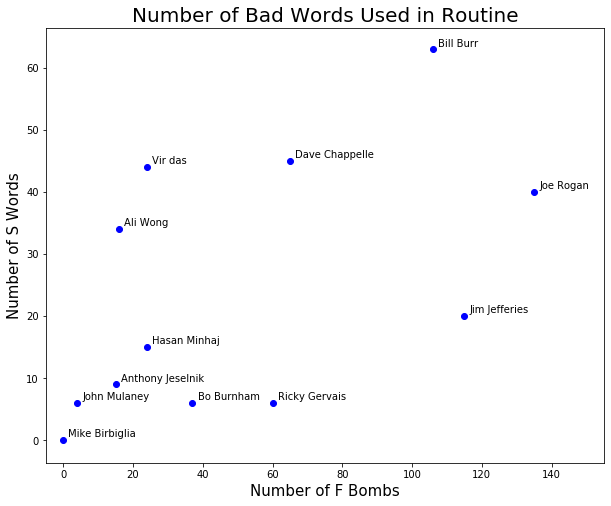

In [59]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_bad_words.index):
    x = data_bad_words.f_word.loc[comedian]
    y = data_bad_words.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()